# <p style="text-align:center;">Search for an article in a Cafeyn App</p>
#### Write a simple script that would initially take in a list of magazine names from a file, and then
#### write a function that uses the user’s search input to return up to 3 alphabetically sorted choices from that list.


### Explanation of the algorithm
 
<b>Autofill</b> is a feature of suggesting possible extensions to a partially written text and is widely used in search engine. 

### Trie Data Structure

TRIE Data Structure also known as the Prefix Tree or Radix Tree is remarked as an excellent Data Structure for processing and storing the Strings and is primarily used for word retrieval.

     1- The nodes in the TRIE Data Structure are used for storing the associate keys of strings and values that are being 
        stored in the TRIE.
     2- TRIE Data Structure so optimized for performing Autofill.
     3- Unlike the popular Binary Trees, each node in TRIE can contain a maximum of 26 nodes which are pointers to the 26       
        different alphabets of English Language.
     4- The position of each node in a TRIE defines the key with which the node is associated.
     5- This makes the TRIE indexing suitable for maintaining the variable sized key values. The actual key values is never    
        stored but the key values are implied through links. A TRIE of Order 26 can maintain a whole English dictionary.

### Pictorial representation of Trie 
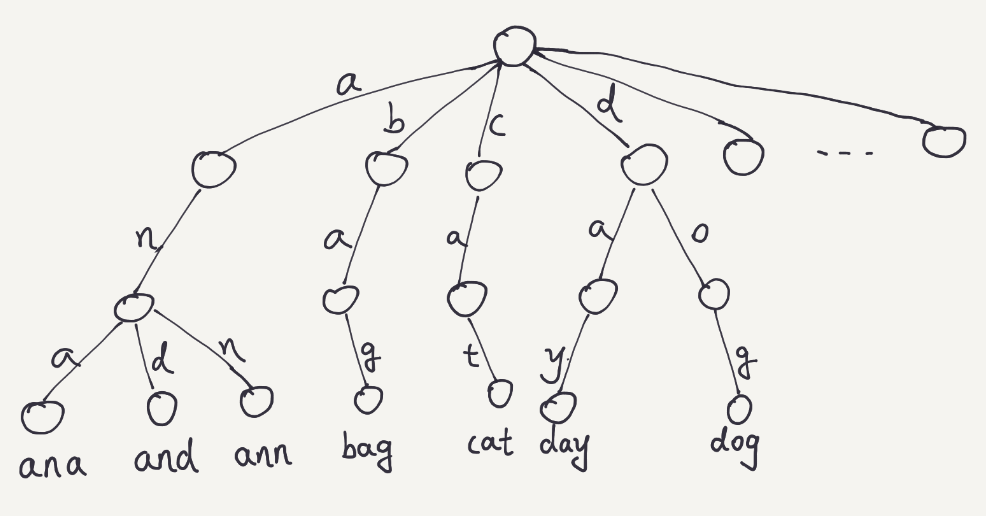

I have used Trie data structure which is explained above to autofill the search. 

In [1]:
#to load the file in the variable "filename"
filename = "liste_magazine.txt"
with open(filename) as f:              #open() --> opens the file
    pre_list = f.read().splitlines()   #read() -> reads the file splitlines()-> returns a list with all the lines in string
    org_list = [x for x in pre_list]   # org_list to keep the original list of contents
    list = [x.lower() for x in pre_list]  #list to keep the converted lower case strings 
    #print(list)

list.sort()                              #sort() -> to sort alphabeitcally so that the output is sorted
# for elements in list:
#     print(elements)

In [2]:
#class Trie has __init__() method as constructor to initialize the attributes of the class
words = []
class Trie:
    def __init__(self):
        self.next = {}   
        #next has empty dictionary which is used to keep track of child node(character/s) as the key value pair through link
        self.leaf = False #leaf is the end node when true. 
    
    
 #add_item() method is used to insert all the items of the sorted list in the format of Trie. Each item is passed
 #through this method till the end of the list

    def add_item(self, word):
        count = 0                        #counter to keep track of number of iterations of each item.
        while count < len(word):         #while loop executes till the counter is less than the length of an item
            letter = word[count]         #assigns the content of the word based on index or position
            if not letter in self.next:  #if the character of that word is not in Trie 
                node = Trie()            #inittilize the attributes self.next = {} and self.leaf = false
                self.next[letter] = node
            self = self.next[letter]     #add the character in a trie
            if count == len(word) - 1:   #if all the characters of a word is added to a trie then exit the method else keep adding
                self.leaf = True
            else:
                self.leaf = False
            count += 1


#autofill method() takes the input which user has entered. The entered string can be of any length. If the entered characters
#matches those many characters then it calls the traverse() method and all the words will appear as output
#if the entered characters doesn't match the Trie at any level then it returns "Nothing"

    def autofill(self, word):
        count = 0                          #counter initialized to 0
        add_node = ''                      #to store the entered characters
        while count < len(word):           #run the loop till counter exceeds the length of the entered character
            letter = word[count]           #each character is assigned to letter
            add_node += letter             #assign that character to add_node to store
            if letter in self.next:        #if the entered character is in Trie, get that character      
                self = self.next[letter]   
            else:
                return 'NOTHING'           #else display "Nothing"
            count += 1
        self.traverse(add_node)            #after the successful while, it comes out and calls traverse() to get all the 
        return "\n"                        #possible matching words

#traverse() method -> if no input then all the items of the list are printed else it traverses to all the possible 
#nodes which is beginning from the passed characters as an attribute in word.

    def traverse(self, word):
        if self.leaf:                       #if it reached the end of the node
            for i in org_list:              #to print the original format as I changed the list to lower case above
                if i.lower()==word:
                    #print(i)
                    words.append(i)         #append all to the words list to get only 3 items later
                    
        for count in self.next:            #get the next character from the the trie -> linking to next node or character
            add_node = word + count        #current character/s + next character/s is stored in add_node
            self.next[count].traverse(add_node) #intitialize the attribute and do it recuresively



x = Trie()
for i in list:         
    x.add_item(i)           #add_item() is called for each word in the list
    
input_string = input("Enter the character: ")   #user input to search 
user_input = input_string.lower()               #convert the user input to lowercase to match
print(x.autofill(user_input))                   
for i in words[0:3]:                           #get only 3 items of the list
    print(i)


Enter the character: l


L'Arche de ZoÃ©
L'Automobile Magazine
L'Encre Indienne


### (NB)try to write well documented & clean code as much as possible and explain the complexity O(n) of your code as a whole.
       
       If tried with other data structures the complexity of the list would be  
        List-> O(NM) where N is the number of words in list and M is the length of each word
        Binary search Tree -> O(Mlogn) where n is the number of words and M is the length of each word
 
Therefore,
           With Trie, find <h4>The Best Case Time Complexity has been described as O(1) while the Average and Worst Case is described as O(Length-Of-Key).</h4> 
           time where N represent the length of a single word.
           This is obviously faster than BST. 
           This is also faster than Hashing because of the ways it is implemented. 
           We do not need to compute any hash function. No collision handling is required 
           Another advantage of Trie is, we can easily print all words in alphabetical order which is not easily possible with              hashing. We can efficiently do prefix search (or auto-complete) with Trie.
        
        
Note: The total explanation has been given above.

### Bonus: Can you describe the limitations(if it has any) of your code?

        No code or say data structures considered to be the best. A code or the data structure can be efficient. According     
        to me, this is the efficient code in terms of time complexity. 
        
        But there are few limitations with this data structure.

Limitation 1:
        The main disadvantage of Tries is that they need a lot of memory for storing the strings. For each node we 
        have too many node pointers(equal to number of characters of the alphabet).
        
        

Limitation 2: 
        The search results in only 3 outputs which could mean that the user might not find the required magazine.
        Also, Considering the alphabetically sorted output, the user desired output will not be seen to user's eye.
        
        for example:
        A user searches for the magazine beginning with "az" which could be in the 40th position, which will be a hectic task   
        for the user to look into all the searchs ->  the solution to this is given in below section  "How could we improve our 
        autocomplete service"
        
Limitation 3:
        If there is an error in the spelling of a magazine then the code retuns "Nothing" and that could impact the sales or 
        views of the magazine, which is of high probability.
        
        for example:
        list = ["Cultures Marines", "Cuisine Revue", "Cuisine a & d"] 
        if a user wants "Cuisine a & d" magazine, but he searches as "kui" instead of "cui" then the code will return nothing. 

        
### Is it scalable?

        Yes, it is scalable. The code is written in the class section and the required changes can be made by calling that 
        particular method from the class, from anywhere. So it is easily accessed, modified and upgraded with few lines of 
        codes.
        
### How could we improve our autocomplete service?
  
        An efficient question to answer, 
        
Improvements could be done:

suggestion 1 for limitation one:     
        If space is concerned, then the alternate could be, Ternary Search Tree can be peferred for dictionary implementations.
        The time complexity is not better than trie, which is O(h) where h is the height of the tree, but not better than the 
        Trie.

suggestion 2 for limitation 2:
        When a user searches for a particular magazine for the first time, then it is highly likely that the user would want the 
        same result to be shown at the top. If there is a hit on one particular magazine then that particular magazine name must 
        be shown at the top by using machine learning and probabiltity that the user might want to search the same magazine.
        
        for example:        
        list = ["Cultures Marines", "Cuisine Revue",......, "Cuisine a & d",............] list of 100 magazines.
        if a user wants "Cuisine a & d" and searches "cu" then the required magazine will be at 30th postion 
        
        Next time -> if a user searches "cu", the required output "Cuisine a & d" must be shown at the top, for the ease of 
        access.
        
suggestion 3 for limitation 3:
        For the limitation 3, it would be very useful to use something like compact Trie data structure along with deep learning 
        and probability to give the predicted output by estimating other characters of a word.
        
        For example: 
        
        list = ["Cultures Marines", "Cuisine Revue", "Cuisine a & d"] 
        if a user wants "Cuisine a & d" magazine, but he searches as "kuis" instead of "cuis" then the code should return these 
        possible output matching with second, third and fourth postion.
        
        to not get the large amount of output we can give a constraint like, 
        if 3 or more characters matches then return the other possible answers.
        
        